# KMeans Clustering

#### 1. Introduction
#### 2. Importing Required Libraries
#### 3. Loading Processed Data
#### 4. Finding Optimal Number of Clusters (Elbow Method)
#### 5. Applying KMeans Clustering
#### 6. Cluster Evaluation (Silhouette Score)
#### 7. Cluster Visualization
#### 8. Cluster Interpretation

## Introduction
KMeans is an unsupervised clustering algorithm that groups customers
based on similarity in their features. In this notebook, KMeans is
applied to segment mall customers into meaningful groups.


## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Loading Processed Data

In [2]:
import pickle

with open("../data/processed/mall_customers_scaled.pkl", "rb") as f:
    df_scaled = pickle.load(f)

df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Recency,Frequency,Monetary
0,1.128152,-1.424569,-1.738999,-0.434801,0.434801,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704,-1.195704,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913,1.715913,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418,-1.040418,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980,0.395980,-1.662660,-0.395980


## Finding Optimal Number of Clusters – Elbow Method

In [3]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

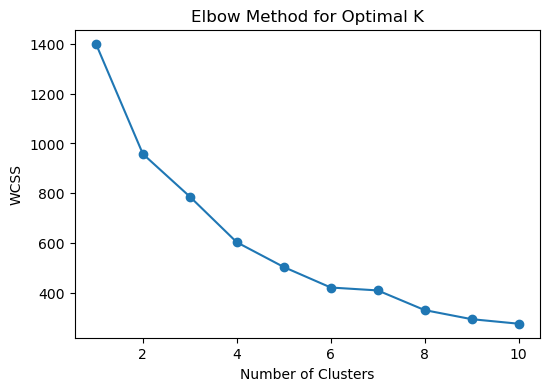

In [4]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

The graph suggests that the optimal no of clusters is likely between 3 and 4.

## Comparing k = 3 and k = 4 using Silhouette Score

In [5]:
from sklearn.metrics import silhouette_score

# Try k = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(df_scaled)
silhouette_3 = silhouette_score(df_scaled, labels_3)

# Try k = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(df_scaled)
silhouette_4 = silhouette_score(df_scaled, labels_4)

silhouette_3, silhouette_4

(0.2579759883610909, 0.3081923817348004)

So , according to silhouette score model with 4 clusters will perform better.

## Select Final Model

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

## Attaching Cluster Labels

In [7]:
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = cluster_labels

df_clustered.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Recency,Frequency,Monetary,Cluster
0,1.128152,-1.424569,-1.738999,-0.434801,0.434801,-1.738999,-0.434801,2
1,1.128152,-1.281035,-1.738999,1.195704,-1.195704,-1.738999,1.195704,2
2,-0.886405,-1.352802,-1.700830,-1.715913,1.715913,-1.700830,-1.715913,0
3,-0.886405,-1.137502,-1.700830,1.040418,-1.040418,-1.700830,1.040418,2
4,-0.886405,-0.563369,-1.662660,-0.395980,0.395980,-1.662660,-0.395980,2


In [10]:
df_clustered.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Recency,Frequency,Monetary,Cluster
195,-0.886405,-0.276302,2.268791,1.118061,-1.118061,2.268791,1.118061,1
196,-0.886405,0.441365,2.497807,-0.861839,0.861839,2.497807,-0.861839,3
197,1.128152,-0.491602,2.497807,0.923953,-0.923953,2.497807,0.923953,1
198,1.128152,-0.491602,2.917671,-1.250054,1.250054,2.917671,-1.250054,3
199,1.128152,-0.635135,2.917671,1.273347,-1.273347,2.917671,1.273347,1


## Final Silhouette Score

In [11]:
final_silhouette = silhouette_score(df_scaled, cluster_labels)
final_silhouette

0.3081923817348004

## PCA for Visualization

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels

## Cluster Visualization

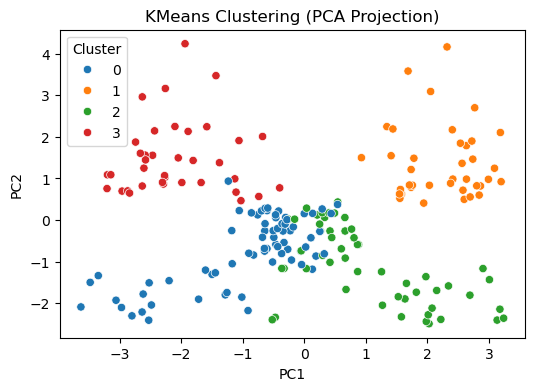

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca,
    palette='tab10'
)
plt.title("KMeans Clustering (PCA Projection)")
plt.show()

## Cluster Profiling

In [14]:
df_clustered.groupby('Cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Recency,Frequency,Monetary
Cluster,,,,,,,
0,-0.091932,0.939689,-0.510051,-0.393246,0.393246,-0.510051,-0.393246
1,0.043390,-0.441917,0.991583,1.239503,-1.239503,0.991583,1.239503
2,-0.050174,-0.989906,-0.756677,0.482266,-0.482266,-0.756677,0.482266
3,0.202545,0.080592,1.017453,-1.242710,1.242710,1.017453,-1.242710


## Business Interpretation
+ KMeans clustering identified four distinct customer segments.<br>
+ Cluster 1 represents high-value customers with high income and spending,
  making them ideal targets for premium and loyalty programs.<br>
+ Cluster 3 includes high-income but low-spending customers who can be
  converted through personalized marketing.<br>
+ Clusters 0 and 2 represent lower-value segments requiring re-engagement
  and promotional strategies.

## Saving the K-Means Model

In [16]:
import pickle

with open("../model/kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

## Summary
Based on the Elbow method and silhouette score comparison, k = 4 was selected
as the optimal number of clusters. The resulting clusters show clear separation
and meaningful business interpretation.